# Movie Data eda

- What is the problem you are seeking to answer?
 - What is the problem you are seeking to answer?
 - Business insights: This can help movie companies optimize their budgets to maximize profits while ensuring audience satisfaction.
  - Stakeholder: Movie companies seeking to maximize profit
- Make a logical case for the possibility of multiple outcomes.
 - Higher budget -> More advertisement -> More viewers -> **More ratings**
  - Higher budget -> No budget allocated to marketing -> **No impact on ratings**
  - Higher budget -> More advertisement and less on quality of movie -> **Lower rating**
  - Lower budget -> Good quality of production -> **Better rating**
- What is the ideal experiment to examine the issue?
 - Regression. Two sample testing
- Present descriptive statistics/visualizations describing
your data and the important relationships.
  - ...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
os.chdir('/content/drive/MyDrive/data')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats

In [4]:
title_ratings = pd.read_csv('title.ratings.tsv', sep='\t')
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2100
1,tt0000002,5.6,282
2,tt0000003,6.5,2118
3,tt0000004,5.4,182
4,tt0000005,6.2,2850


In [5]:
df = pd.read_csv('TMDB_movie_dataset_v11.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [6]:
df = df.merge(title_ratings, left_on='imdb_id', right_on='tconst')

In [7]:
df.shape

(435549, 27)

In [8]:
df["release_date"] = pd.to_datetime(df["release_date"])

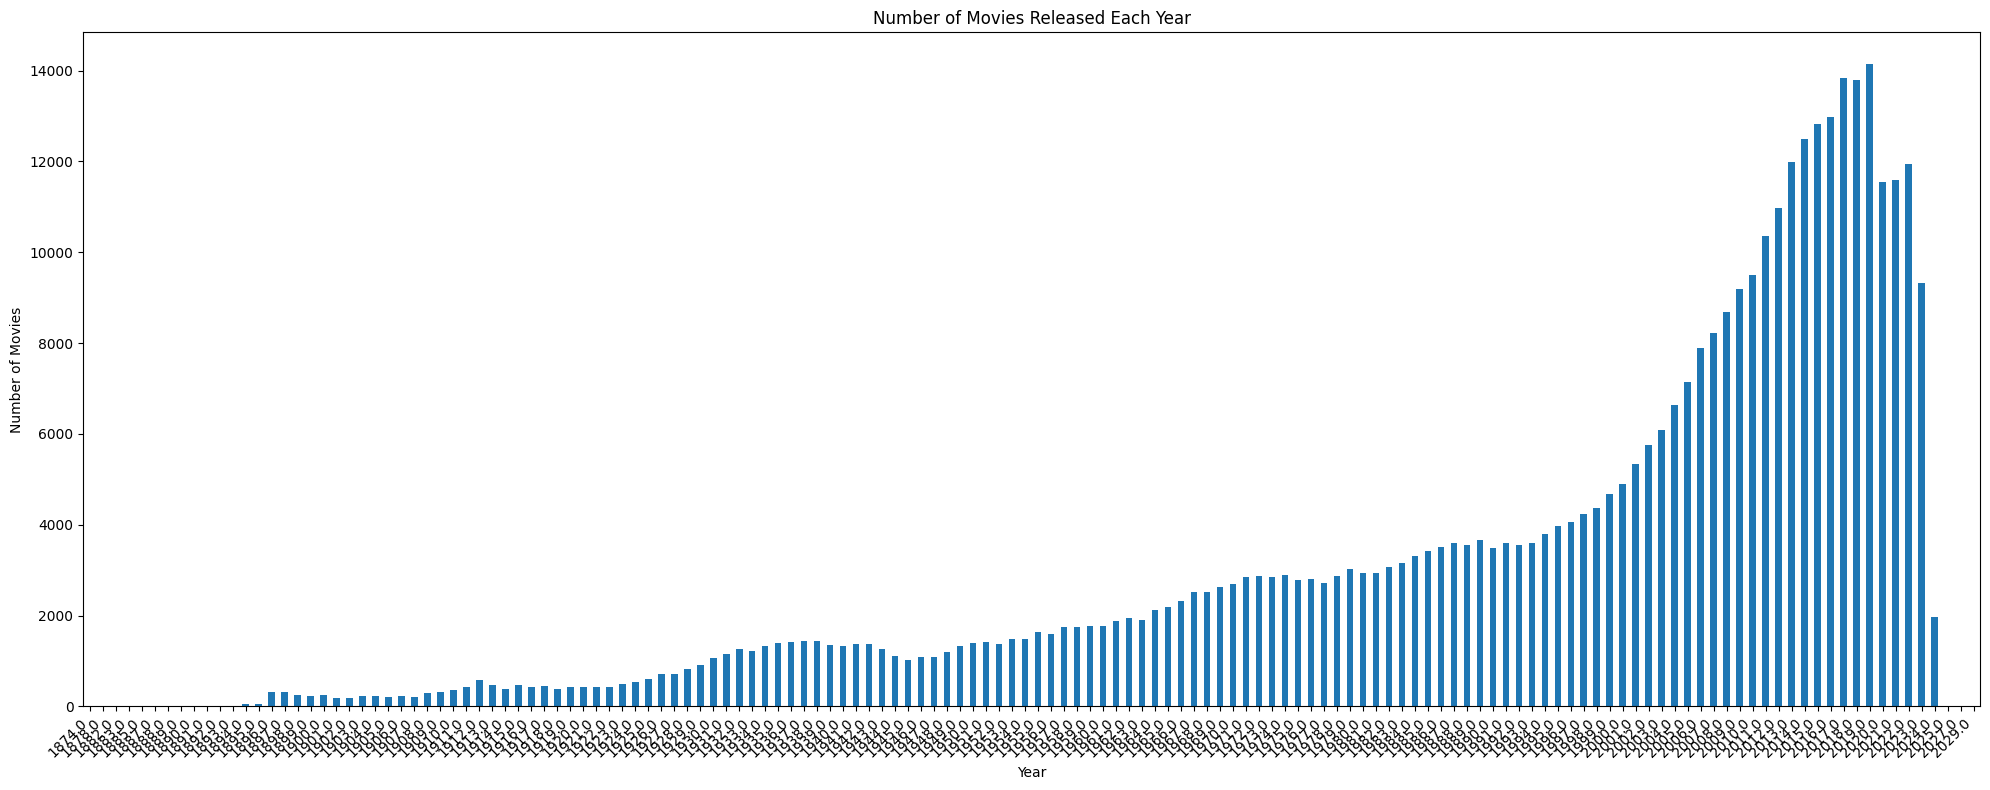

In [9]:
df['year'] = df['release_date'].dt.year

# Group by year and count rows
rows_by_year = df.groupby('year').size()

# Create the plot
plt.figure(figsize=(20, 8))
rows_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [10]:
df = df[(df.year >= 2000) & (df.year <= 2025)]
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,tconst,averageRating,numVotes,year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",tt1375666,8.8,2611469,2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",tt0816692,8.7,2193642,2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",tt0468569,9.0,2942753,2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",tt0499549,7.9,1408115,2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",tt0848228,8.0,1482940,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435541,752556,Papapa,0.000,0,Released,2020-08-31,0,23,False,NaN,...,NaN,Drama,Den Norske Filmskolen,Norway,"Danish, Norwegian",NaN,tt12580484,7.9,11,2020.0
435544,752569,Drama Out of a Crisis: A Celebration of Play f...,0.000,0,Released,2020-10-12,0,89,False,NaN,...,NaN,Documentary,NaN,United Kingdom,English,filmmaking,tt13267284,7.5,34,2020.0
435546,752581,The Lucky Woman,0.000,0,Released,2020-10-18,0,87,False,/v3Ucl79EaF0GGWEHm1LyRitvwpQ.jpg,...,NaN,Documentary,Shine Pictures,Taiwan,"Mandarin, Vietnamese","illegal employment, taiwan, vietnamese, migran...",tt13118622,7.6,5,2020.0
435547,752590,Crows,0.000,0,Released,2020-10-22,0,80,False,NaN,...,NaN,Drama,NaN,"Canada, Iran",Persian,NaN,tt13387200,6.4,33,2020.0


In [11]:
df = df[df.budget != 0]
df.shape

(21966, 28)

In [12]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'tconst', 'averageRating', 'numVotes', 'year'],
      dtype='object')

In [13]:
df.drop(columns=['vote_average', 'vote_count', 'status',
                 'adult', 'backdrop_path', 'homepage',
                 'poster_path', 'tagline',
                 'keywords', 'spoken_languages','tconst'], inplace=True)

<ipython-input-13-519fbcec1e07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['vote_average', 'vote_count', 'status',


In [14]:
df.columns

Index(['id', 'title', 'release_date', 'revenue', 'runtime', 'budget',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'averageRating', 'numVotes', 'year'],
      dtype='object')

In [15]:
# prompt: find the deciles for budget and revenue every 5 percent

import numpy as np
# Calculate deciles for budget and revenue
for percentile in range(0, 101, 5):
  budget_percentile = np.percentile(df['budget'], percentile)
  print(f"{percentile}% Budget Percentile: {budget_percentile}")


0% Budget Percentile: 1.0
5% Budget Percentile: 110.0
10% Budget Percentile: 1000.0
15% Budget Percentile: 3420.75
20% Budget Percentile: 8000.0
25% Budget Percentile: 15000.0
30% Budget Percentile: 30000.0
35% Budget Percentile: 60000.0
40% Budget Percentile: 125000.0
45% Budget Percentile: 250000.0
50% Budget Percentile: 500000.0
55% Budget Percentile: 1000000.0
60% Budget Percentile: 1500000.0
65% Budget Percentile: 2244597.75
70% Budget Percentile: 3600000.0
75% Budget Percentile: 5607500.0
80% Budget Percentile: 9800000.0
85% Budget Percentile: 15000000.0
90% Budget Percentile: 26000000.0
95% Budget Percentile: 55000000.0
100% Budget Percentile: 888000000.0


In [16]:
df = df[(df['budget'] >= 8000) & (df['budget'] <= 55000000)]

In [17]:
df.head()

,id,title,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year
18,475557,Joker,2019-10-01,1074458282,122,55000000,tt7286456,en,Joker,"During the 1980s, a failed stand-up comedian i...",54.522,"Crime, Thriller, Drama","Warner Bros. Pictures, Joint Effort, Village R...","Canada, United States of America",8.4,1558503,2019.0
62,346364,It,2017-09-06,701800000,135,40000000,tt1396484,en,It,"In a small town in Maine, seven children known...",74.730,"Horror, Fantasy","New Line Cinema, Vertigo Entertainment, Lin Pi...",United States of America,7.3,627916,2017.0
63,245891,John Wick,2014-10-22,88761661,101,20000000,tt2911666,en,John Wick,Ex-hitman John Wick comes out of retirement to...,55.739,"Action, Thriller","87Eleven, DefyNite Films, MJW Films, Thunder Road",United States of America,7.4,758929,2014.0
80,329865,Arrival,2016-11-10,203388186,116,47000000,tt2543164,en,Arrival,Taking place after alien crafts land around th...,47.983,"Drama, Science Fiction, Mystery","FilmNation Entertainment, Lava Bear Films, Rel...","Canada, India, United States of America",7.9,793528,2016.0
81,496243,Parasite,2019-05-30,257591776,133,11363000,tt6751668,ko,기생충,"All unemployed, Ki-taek's family takes peculia...",64.627,"Comedy, Thriller, Drama",Barunson E&A,South Korea,8.5,1005987,2019.0


In [18]:
for percentile in range(0, 101, 5):
  revenue_percentile = np.percentile(df['revenue'], percentile)
  print(f"{percentile}% Revenue Percentile: {revenue_percentile}")

0% Revenue Percentile: 0.0
5% Revenue Percentile: 0.0
10% Revenue Percentile: 0.0
15% Revenue Percentile: 0.0
20% Revenue Percentile: 0.0
25% Revenue Percentile: 0.0
30% Revenue Percentile: 0.0
35% Revenue Percentile: 0.0
40% Revenue Percentile: 0.0
45% Revenue Percentile: 0.0
50% Revenue Percentile: 0.0
55% Revenue Percentile: 0.0
60% Revenue Percentile: 0.0
65% Revenue Percentile: 0.0
70% Revenue Percentile: 88237.79999999987
75% Revenue Percentile: 1100000.0
80% Revenue Percentile: 4400000.0
85% Revenue Percentile: 12052242.199999997
90% Revenue Percentile: 29354344.6
95% Revenue Percentile: 70958047.9999998
100% Revenue Percentile: 1074458282.0


In [19]:
for percentile in range(0, 101, 5):
  rating_percentile = np.percentile(df['averageRating'], percentile)
  print(f"{percentile}% Rating Percentile: {rating_percentile}")

0% Rating Percentile: 1.0
5% Rating Percentile: 3.2
10% Rating Percentile: 3.9
15% Rating Percentile: 4.4
20% Rating Percentile: 4.8
25% Rating Percentile: 5.1
30% Rating Percentile: 5.4
35% Rating Percentile: 5.6
40% Rating Percentile: 5.8
45% Rating Percentile: 6.0
50% Rating Percentile: 6.2
55% Rating Percentile: 6.3
60% Rating Percentile: 6.5
65% Rating Percentile: 6.7
70% Rating Percentile: 6.8
75% Rating Percentile: 7.0
80% Rating Percentile: 7.2
85% Rating Percentile: 7.4
90% Rating Percentile: 7.7
95% Rating Percentile: 8.2
100% Rating Percentile: 10.0


Revenue Statistics:
 count    1.656500e+04
mean     1.117896e+07
std      3.957762e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.100000e+06
max      1.074458e+09
Name: revenue, dtype: float64


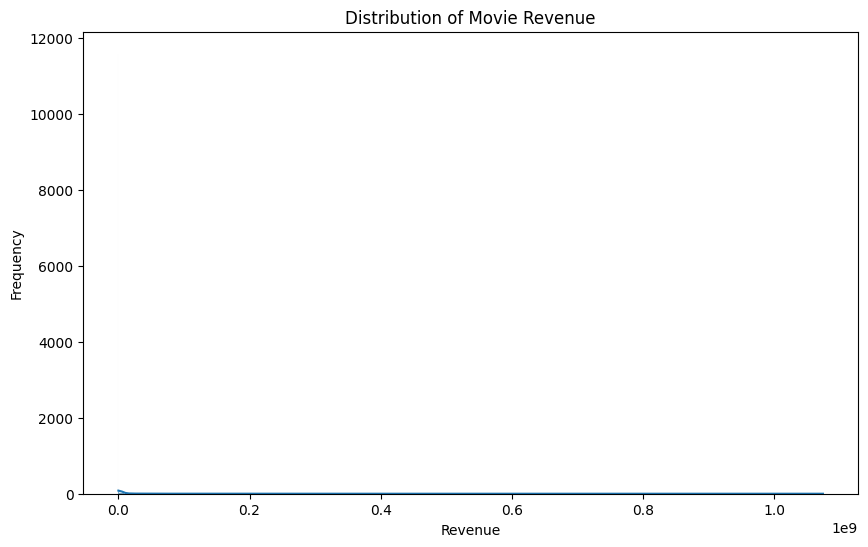

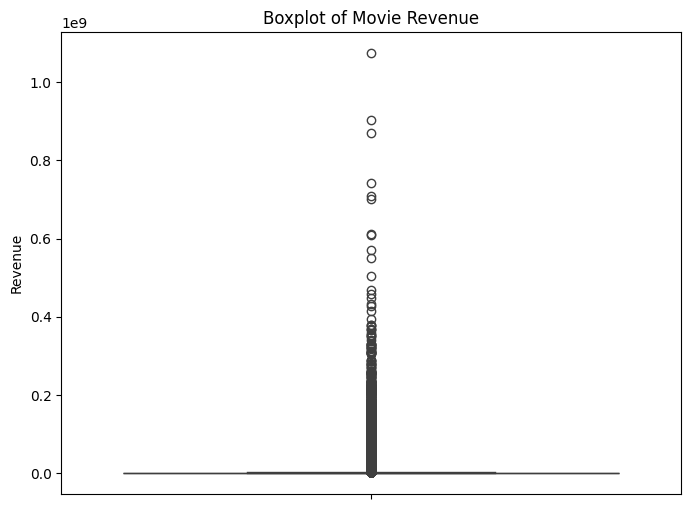

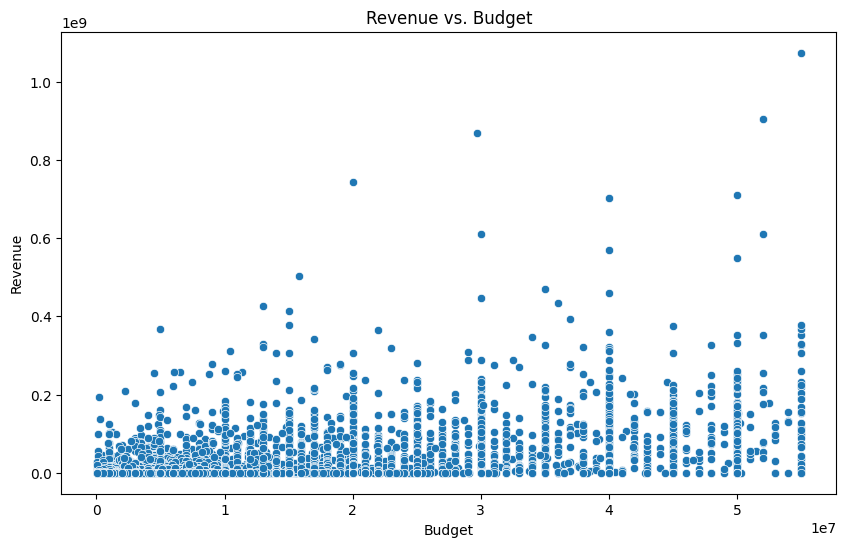

Correlation between Revenue and Budget: 0.5597902173162403


In [20]:
# prompt: can you explore the revenue collumn

# Analyze the 'revenue' column
revenue_stats = df['revenue'].describe()
print("Revenue Statistics:\n", revenue_stats)

# Visualize the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True)
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['revenue'])
plt.title('Boxplot of Movie Revenue')
plt.ylabel('Revenue')
plt.show()

# Explore the relationship between revenue and other variables (e.g., budget)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Calculate the correlation between revenue and budget
correlation = df['revenue'].corr(df['budget'])
print(f"Correlation between Revenue and Budget: {correlation}")

# Further analysis can include:
# - Investigating revenue by genre or other categorical features.
# - Identifying potential outliers and their characteristics.
# - Analyzing the relationship between revenue and other numerical features like popularity or runtime.
# - Modeling the revenue based on relevant features.


In [21]:
df.columns

Index(['id', 'title', 'release_date', 'revenue', 'runtime', 'budget',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'averageRating', 'numVotes', 'year'],
      dtype='object')

In [22]:
model = smf.ols('averageRating ~ budget + numVotes', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     309.6
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          9.70e-133
Time:                        20:09:31   Log-Likelihood:                -29744.
No. Observations:               16565   AIC:                         5.949e+04
Df Residuals:                   16562   BIC:                         5.952e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9572      0.013    456.969      0.0

In [23]:
# Fit the regression model
model = smf.ols('averageRating ~ budget + numVotes + runtime', data=df).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     243.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          8.97e-155
Time:                        20:09:31   Log-Likelihood:                -29691.
No. Observations:               16565   AIC:                         5.939e+04
Df Residuals:                   16561   BIC:                         5.942e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2262      0.029    214.965      0.0

In [24]:
model = smf.ols('averageRating ~ budget + numVotes + runtime + year', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     223.0
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          8.75e-187
Time:                        20:09:31   Log-Likelihood:                -29614.
No. Observations:               16565   AIC:                         5.924e+04
Df Residuals:                   16560   BIC:                         5.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.2704      3.745    -10.754      0.0

In [25]:
# prompt: filter new data for revenue over 80000 and less than 71000000

# Filter the DataFrame for revenue between 80000 and 71000000
filtered_df = df[(df['revenue'] > 80000) & (df['revenue'] < 71000000)]

# Display the filtered DataFrame
filtered_df


,id,title,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year
135,244786,Whiplash,2014-10-10,13092000,107,3300000,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",54.495,"Drama, Music","Bold Films, Blumhouse Productions, Right of Wa...",United States of America,8.5,1028257,2014.0
139,77,Memento,2000-10-11,39723096,113,9000000,tt0209144,en,Memento,Leonard Shelby is tracking down the man who ra...,31.795,"Mystery, Thriller","Summit Entertainment, Newmarket Capital Group,...",United States of America,8.4,1348607,2000.0
145,152601,Her,2013-12-18,47351251,126,23000000,tt1798709,en,Her,"In the not so distant future, Theodore, a lone...",37.608,"Romance, Science Fiction, Drama","Annapurna Pictures, Warner Bros. Pictures, Sta...",United States of America,8.0,686542,2013.0
173,264660,Ex Machina,2015-01-21,36869414,108,15000000,tt0470752,en,Ex Machina,"Caleb, a coder at the world's largest internet...",26.767,"Drama, Science Fiction","DNA Films, Film4 Productions, IAC Films, Scott...","United Kingdom, United States of America",7.7,605901,2015.0
201,141,Donnie Darko,2001-10-24,7500000,114,6000000,tt0246578,en,Donnie Darko,"After narrowly escaping a bizarre accident, a ...",38.016,"Fantasy, Drama, Mystery","Flower Films, Gaylord Films, Adam Fields Produ...",United States of America,8.0,866369,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426269,768710,One Life at a Time,2020-10-10,100000,73,100000,tt12649538,en,One Life at a Time,"Featuring Dean Cain and Luke Schroder, One Lif...",1.757,Drama,JCFilms,United States of America,5.7,81,2020.0
431491,725083,Blues for Life,2016-12-02,2000000,111,750000,tt3523996,en,Blues for Life,"A young singer, played by Diamond of Crime Mob...",1.142,"Action, Drama","Promises Entertainment, Scotlawood Motion Pict...",United States of America,5.3,10,2016.0
432906,756895,Mimpi Moon,2000-04-06,140000,103,385000,tt0244659,en,Mimpi Moon,Childhood sweethearts Moonir and Vina are reun...,0.841,NaN,Pesona Pictures,NaN,7.3,25,2000.0
433640,761273,Joji Presents: THE EXTRAVAGANZA,2020-10-23,1000000,72,100000,tt14642304,en,Joji Presents: THE EXTRAVAGANZA,Joji celebrates the release of his second stud...,1.400,Music,88 Rising,United States of America,8.9,26,2020.0


In [26]:
model = smf.ols('averageRating ~ revenue + budget+ numVotes', data=filtered_df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     171.5
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          8.41e-105
Time:                        20:09:31   Log-Likelihood:                -6344.4
No. Observations:                4157   AIC:                         1.270e+04
Df Residuals:                    4153   BIC:                         1.272e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1079      0.025    240.861      0.0

In [27]:
# Fit the regression model with revenue included
model = smf.ols('averageRating ~ revenue + budget + runtime + numVotes', data=filtered_df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     197.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          5.40e-155
Time:                        20:09:31   Log-Likelihood:                -6225.6
No. Observations:                4157   AIC:                         1.246e+04
Df Residuals:                    4152   BIC:                         1.249e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0056      0.075     66.977      0.0

In [28]:
filtered_df.columns

Index(['id', 'title', 'release_date', 'revenue', 'runtime', 'budget',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'averageRating', 'numVotes', 'year'],
      dtype='object')

In [29]:
model = smf.ols('averageRating ~ revenue + budget + year + numVotes', data=filtered_df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     128.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          6.93e-104
Time:                        20:09:31   Log-Likelihood:                -6343.8
No. Observations:                4157   AIC:                         1.270e+04
Df Residuals:                    4152   BIC:                         1.273e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0253      5.849     -0.004      0.9

In [30]:
df.to_csv('Movie_data.csv')

In [31]:
filtered_df.columns


Index(['id', 'title', 'release_date', 'revenue', 'runtime', 'budget',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'averageRating', 'numVotes', 'year'],
      dtype='object')

In [32]:
# prompt: run a linear regression model on averageRating with independent variables interaction term without creating a new variable Budget × Revenue: To check if higher-budget movies with high revenue get better ratings.

import statsmodels.formula.api as smf

# Fit the linear regression model with the interaction term
model = smf.ols('averageRating ~ budget * revenue + year + numVotes + runtime', data=filtered_df).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     157.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          7.12e-154
Time:                        20:09:32   Log-Likelihood:                -6225.5
No. Observations:                4157   AIC:                         1.246e+04
Df Residuals:                    4151   BIC:                         1.250e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.19e-06   2.18e-08     54.

In [33]:
# prompt: run a linear regression model on averageRating with independent variables interaction term without creating a new variable Budget × Runtime: To see if longer movies with higher budgets have better ratings.

# Fit the linear regression model with the interaction term
model = smf.ols('averageRating ~ budget * runtime + numVotes + revenue + year', data=filtered_df).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     137.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          7.90e-160
Time:                        20:09:32   Log-Likelihood:                -6209.1
No. Observations:                4157   AIC:                         1.243e+04
Df Residuals:                    4150   BIC:                         1.248e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.0983      5.717      1.

In [34]:
# prompt: run a linear regression model on averageRating with independent variables interaction term without creating a new variable Budget × Popularity: Whether popular high-budget movies are rated differently.

# Fit the linear regression model with the interaction term
model = smf.ols('averageRating ~ budget * popularity + numVotes + runtime + revenue + year', data=filtered_df).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     112.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          5.01e-152
Time:                        20:09:33   Log-Likelihood:                -6224.7
No. Observations:                4157   AIC:                         1.247e+04
Df Residuals:                    4149   BIC:                         1.252e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.7217      5.73

In [35]:
# prompt: Apply log transformation to budget and then run a linear regression model

# Apply log transformation to the 'budget' column
filtered_df['log_budget'] = np.log1p(filtered_df['budget'])

# Fit the linear regression model with log-transformed budget
model = smf.ols('averageRating ~ log_budget + numVotes + runtime', data=filtered_df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     270.4
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          2.48e-160
Time:                        20:09:33   Log-Likelihood:                -6216.2
No. Observations:                4157   AIC:                         1.244e+04
Df Residuals:                    4153   BIC:                         1.247e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5076      0.175     37.144      0.0

<ipython-input-35-94a12345c087>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_budget'] = np.log1p(filtered_df['budget'])


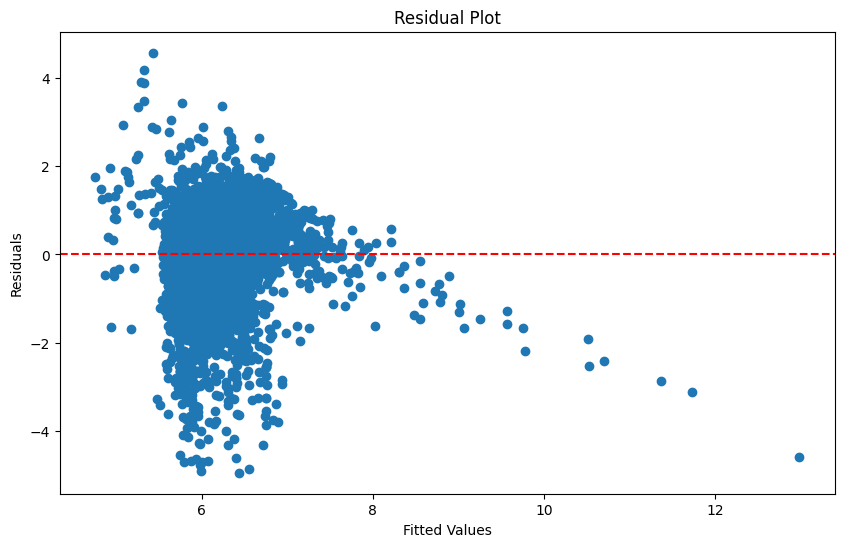

In [36]:
# prompt: visualize the residuals

import matplotlib.pyplot as plt

# Assuming 'model' is your fitted OLS model from statsmodels
residuals = model.resid

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [37]:
# prompt: run a simple regression model on rating with budget on independent variable and give summary

# Assuming 'filtered_df' and 'smf' are already defined from previous code

# Fit the simple linear regression model
model = smf.ols('averageRating ~ budget', data=filtered_df).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.03
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000183
Time:                        20:09:33   Log-Likelihood:                -6580.1
No. Observations:                4157   AIC:                         1.316e+04
Df Residuals:                    4155   BIC:                         1.318e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2519      0.025    246.091      0.0

In [38]:
# Extract predicted values
predicted_ratings = linear_model.fittedvalues

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='averageRating', data=df)
plt.plot(df['budget'], predicted_ratings, color='red', label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.title('Budget vs. Average Rating with Regression Line')
plt.legend()
plt.show()

NameError: name 'linear_model' is not defined

In [ ]:

# Fit the linear regression model
linear_model2 = smf.ols('averageRating ~ budget', data=df).fit()

# Create the regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='averageRating', data=df)
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.title('Budget vs. Average Rating')
plt.show()


In [ ]:
linear_model2 = smf.ols('averageRating ~ budget ', data=filtered_df).fit()

# Extract predicted values
predicted_ratings = linear_model2.fittedvalues

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='averageRating', data=filtered_df)
plt.plot(filtered_df['budget'], predicted_ratings, color='red', label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.title('Budget vs. Average Rating with Regression Line')
plt.legend()
plt.show()

In [ ]:
df.columns

Average Rating = $β_0$ + $β_1$ x Budget

In [ ]:
# Define the formula for the OLS regression
formula = 'averageRating ~ budget + runtime + numVotes'

# Fit the OLS model
model = smf.ols(formula, data=df).fit()

# Print the model summary
print(model.summary())